In [88]:
# Instalación de librerias 

#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [89]:
class TimeSerie:

    def __init__(self,interval,amount_data):
        self.interval = interval
        self.amount_data = amount_data

    def set_data(self):
        self.time = self.interval * np.sort(np.random.rand(self.amount_data))
        self.magnitud = np.random.randn(self.amount_data)

    def normalize(self):
        #Normalizar el tiempo para dejar todos los valores entre 0 y 1
        aux_time = self.time
        self.time =  (aux_time- aux_time.min())/(aux_time.max()-aux_time.min())

    def get_time(self):
        return self.time

    def get_magnitud(self):
        return self.magnitud

    def get_all_data(self):
        all_info = f'interval: {self.interval}\namount_data: {self.amount_data}'
        print(all_info)

    def view_time_serie(self,rows=6,cols=16,font_size=18):
        title_figure = f'Time serie'
        plt.figure(figsize=(cols,rows))
        plt.plot(self.time,self.magnitud)
        plt.scatter(self.time,self.magnitud)
        plt.ylabel("Magnitud")
        plt.xlabel("Time")
        plt.suptitle(title_figure,fontsize=font_size)
        plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
        plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
        plt.show()




interval: 150
amount_data: 100


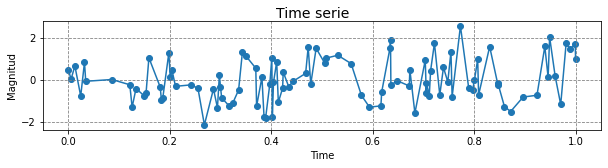

In [90]:
time_serie = TimeSerie(150,100)

time_serie.set_data()
time_serie.normalize()

time_serie.get_all_data()
# print(time_serie.get_time())
time_serie.view_time_serie(2,10,14)

In [91]:
# Configuracion de parametros globales
amount_bins = 10
period = 1
num_periods = 4


In [92]:
#Creacion de un array que contiene los T/n periodos distintos
def generate_periods(num_periods=1):
    all_period = [1]
    
    for i in range(1, num_periods):
        all_period.append(2**i)
    
    return all_period

array_periods = generate_periods(num_periods)
# print(array_periods)


#Creacion del grafico aplicando el metodo de folding
def drawGraphic(bins,time,mag,indice,period):
    title_figure = f'Folded Time Serie with period T/{period}'
    #Grafico para ver la serie de tiempo 
    plt.figure(figsize=(12,4))
    plt.plot(time[indice], mag[indice])
    plt.scatter(time[indice], mag[indice])
    plt.ylabel("Magnitud")
    plt.xlabel("Time")
    plt.suptitle(title_figure, fontsize=22)
    plt.grid(axis='x', color='red', linestyle='-', linewidth=2)
    
    for bin in bins:
        plt.axvline(x=bin,color='red')

    # plt.grid(axis='y', color='gray', linestyle='dashed')
    plt.show()


def getStatistic(index,indBin,magnitud):
    mag_ordered = magnitud[index]
    #print("magOrdered: ", magOrdered)

    # concentration = np.array(concentration)
    vector_mean = np.array([np.nanmean(mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000  for i in range(amount_bins)])
    vector_max = np.array([np.nanmax(mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])
    vector_min = np.array([np.nanmin(mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])
    vector_std = np.array([np.nanstd(mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])

    # print("concentration:", concentration)
    print("mean:",vector_mean)
    print("max:",vector_max)
    print("min:",vector_min)
    print("std:",vector_std)
    return [vector_mean,vector_max,vector_min,vector_std]


def variantion_period(array_periods,time_serie):
    
    tensor_data = []
    # mean = []
    # max = []
    # min = []
    # std = []

    for index, period in enumerate(array_periods):
        # print(periods)
        print(f'Periodo T/{period}')

        #valor del periodo en decimales
        period_float = 1 / period

        #proceso de folding
        folded_time = time_serie.get_time() % period_float
        #indices de los datos para encontrarlos luego del folding
        index_folded = np.argsort(folded_time)

        #Divido el periodo en bins o intervalos [0,n] para luego obtener datos estadisticos de cada bin
        bins = np.linspace(0,period_float,amount_bins+1)

        #Concentración de datos en cada bin
        concentration, bin_edges= np.histogram(folded_time[index_folded],bins=bins)
        #indices - Devuelve los índices de los bins a los que pertenece cada valor del folded_time
        index_bin = np.digitize(folded_time[index_folded],bins=bins)

        print("bins: ",bins)
        print("concentracion de datos en cada bin: ",concentration)
        print("indice de cada bin: ",index_bin)

        drawGraphic(bins,folded_time,time_serie.get_magnitud(),index_folded,period)
        #primer piso de la matriz que contendrá las caracteristicas en distintos periodos
        vectorStatisticPeriod = np.asmatrix(getStatistic(index_folded,index_bin,time_serie.get_magnitud()))

        # vector_mean, vector_max, vector_min, vector_std = np.asmatrix(getStatistic(index_folded,index_bin,time_serie.get_magnitud()))
        # mean.append(vector_mean)
        # max.append(vector_max)
        # min.append(vector_min)
        # std.append(vector_std)
        # concentration = np.array()
        # vectorStatisticPeriod.append(concentration)

        # tensor_data.append(np.array(concentration))
        # print(vectorStatisticPeriod)

        tensor_data.append(vectorStatisticPeriod)
        # print(tensor_data)

        print('-'*100)
    
    # mean = np.array(mean)
    # max = np.array(max)
    # min = np.array(min)
    # std = np.array(std)
    
    # print(mean)
    
    return tensor_data
     

Periodo T/1
bins:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
concentracion de datos en cada bin:  [ 8 10 10 12 13  6  9 14  9  9]
indice de cada bin:  [ 1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10
 10 10 10 10]


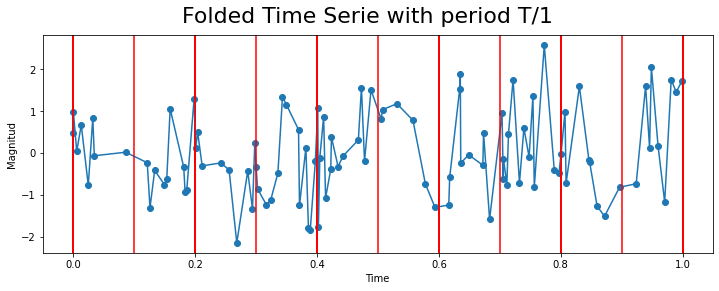

mean: [ 0.26823916 -0.31779677 -0.43819587 -0.47004337  0.13019729  0.28971694
 -0.01603305  0.25563105 -0.24431622  0.7680819 ]
max: [0.97993993 1.28125608 0.48788162 1.32879168 1.5577448  1.1715962
 1.88170163 2.56715478 1.58236103 2.03955063]
min: [-0.77589499 -1.30929326 -2.15171162 -1.83861692 -1.75984914 -1.30481522
 -1.59020864 -0.81493773 -1.51412034 -1.17850329]
std: [0.54140477 0.80129667 0.73815948 1.03075314 0.92681901 0.95289672
 1.08675852 1.01942229 0.95146962 1.12890279]
----------------------------------------------------------------------------------------------------
Periodo T/2
bins:  [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
concentracion de datos en cada bin:  [10  4 10  9 13 11 12  9 13  9]
indice de cada bin:  [ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8  8  9 

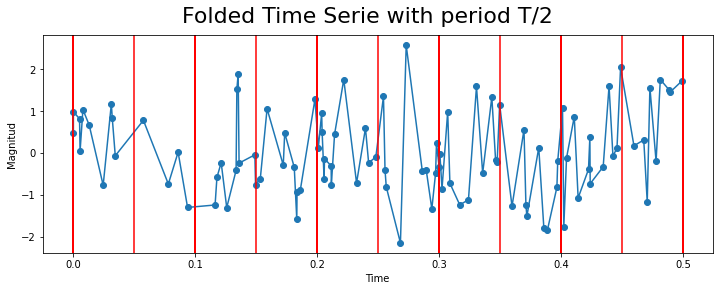

mean: [ 0.51457235 -0.31537714 -0.14590226 -0.20702696  0.10997195 -0.20297811
  0.0151915  -0.89129604  0.11814671  0.7854883 ]
max: [1.1715962  0.77493032 1.88170163 1.28125608 1.748743   2.56715478
 1.58236103 0.55177413 2.03955063 1.74927276]
min: [-0.77589499 -1.30481522 -1.30929326 -1.59020864 -0.75730809 -2.15171162
 -1.24317116 -1.83861692 -1.75984914 -1.17850329]
std: [0.5801574  0.78433654 1.00506191 0.90445263 0.69340821 1.20498591
 0.95529966 0.81526826 1.02398635 0.98888886]
----------------------------------------------------------------------------------------------------
Periodo T/4
bins:  [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25 ]
concentracion de datos en cada bin:  [12  9  7  9  7 12 12 10 13  9]
indice de cada bin:  [ 1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8 

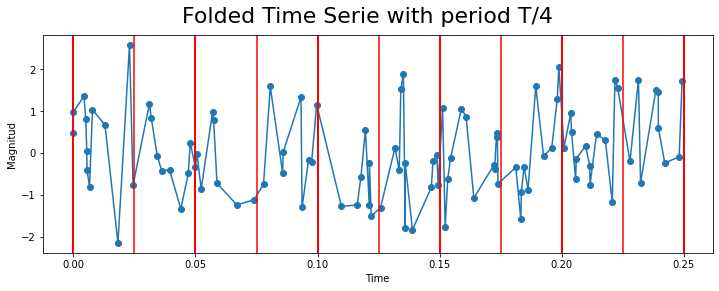

mean: [ 0.31261572 -0.09315826 -0.31654795  0.12629167 -0.79556914 -0.32597525
 -0.09848882  0.08545304  0.21205815  0.63803044]
max: [2.56715478 1.1715962  0.98259359 1.58236103 0.55177413 1.88170163
 1.06392835 2.03955063 1.748743   1.74927276]
min: [-2.15171162 -1.3400271  -1.24317116 -1.30481522 -1.51412034 -1.83861692
 -1.75984914 -1.59020864 -1.17850329 -0.72127418]
std: [1.17741173 0.71120759 0.84007502 0.94442682 0.69040582 1.09558798
 0.85009414 1.12691153 0.82401211 0.92415523]
----------------------------------------------------------------------------------------------------
Periodo T/8
bins:  [0.     0.0125 0.025  0.0375 0.05   0.0625 0.075  0.0875 0.1    0.1125
 0.125 ]
concentracion de datos en cada bin:  [15  9 10 11 10  7 12 10  4 12]
indice de cada bin:  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  5  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  

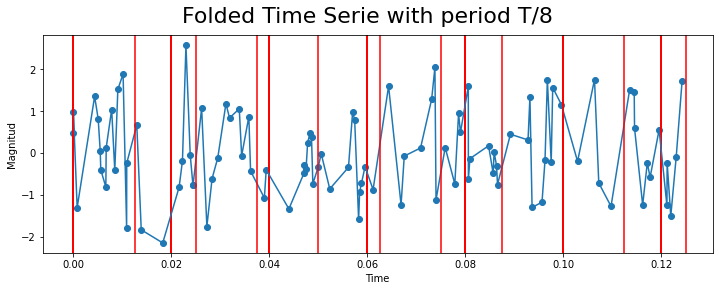

mean: [ 0.21309279 -0.37296736  0.19745767 -0.36316972 -0.39441977  0.36898464
  0.02031251  0.36496309 -0.11361248  0.05231166]
max: [1.88170163 2.56715478 1.1715962  0.47423769 0.98259359 2.03955063
 1.58236103 1.748743   1.74927276 1.71896072]
min: [-1.79142717 -2.15171162 -1.75984914 -1.3400271  -1.59020864 -1.24317116
 -0.75730809 -1.30481522 -1.27803023 -1.51412034]
std: [1.0286151  1.32007547 0.91327283 0.54250185 0.75542764 1.20702659
 0.67947052 1.03467243 1.14058193 1.07351707]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
[[[ 0.26823916 -0.31779677 -0.43819587 -0.47004337  0.13019729
    0.28971694 -0.01603305  0.25563105 -0.24431622  0.7680819 ]
  [ 0.97993993  1.28125608  0.48788162  1.32879168  1.5577448
    1.1715962   1.88170163  2.56715478  1.58236103  2.03955063]
  [-0.77589499 -1.30929326 -2.15171162 -1.83861692 -

In [93]:
tensor_output = np.array(variantion_period(array_periods,time_serie))


print('-'*100)

print(tensor_output)